In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pickle

# 1. Load the dataset
df = pd.read_csv('anemia.csv')

# Basic inspection
print("Dataset Shape:", df.shape)
print("\n--- First 5 rows ---")
display(df.head())

print("\n--- Data Types ---")
print(df.dtypes)

Dataset Shape: (1421, 6)

--- First 5 rows ---


,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0



--- Data Types ---
Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object


Missing values per column:
Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

--- Target Distribution (Result) ---
Result
0    0.563688
1    0.436312
Name: proportion, dtype: float64


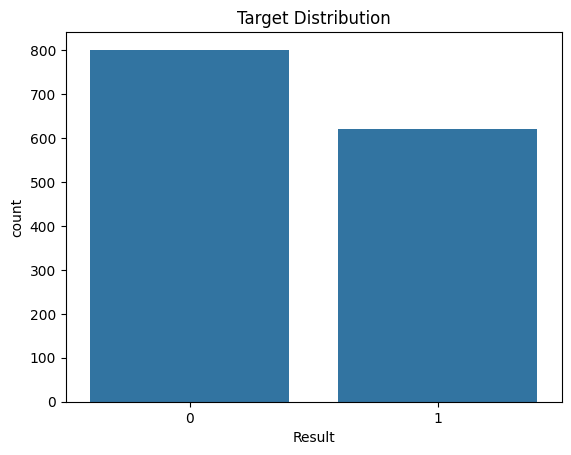

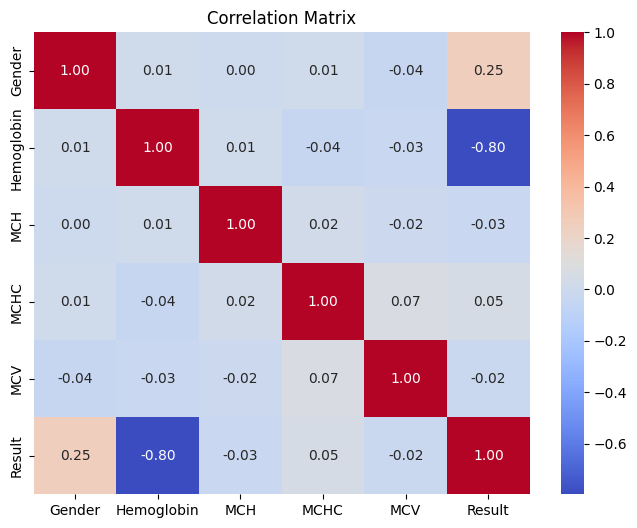

In [11]:
# 2. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 3. Target Variable Distribution
# 0 = Healthy, 1 = Anemia (Based on Hemoglobin levels)
print("\n--- Target Distribution (Result) ---")
print(df['Result'].value_counts(normalize=True))

# Visualization
sns.countplot(x=df['Result'])
plt.title('Target Distribution')
plt.show()

# 4. Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
# 5. Split Data (60% Train, 20% Val, 20% Test)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.Result.values
y_val = df_val.Result.values
y_test = df_test.Result.values

del df_train['Result']
del df_val['Result']
del df_test['Result']

print(f"Train size: {len(df_train)}")
print(f"Val size:   {len(df_val)}")
print(f"Test size:  {len(df_test)}")

Train size: 852
Val size:   284
Test size:  285


In [13]:
# 6. Feature Engineering (One-Hot Encoding via DictVectorizer)
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

# 7. Train Logistic Regression
print("\n--- Training Logistic Regression ---")
model = LogisticRegression(solver='liblinear', C=1.0, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"Logistic Regression ROC-AUC: {auc:.4f}")

# 8. Train Decision Tree (Comparison)
print("\n--- Training Decision Tree ---")
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
auc_dt = roc_auc_score(y_val, y_pred_dt)
print(f"Decision Tree ROC-AUC: {auc_dt:.4f}")


--- Training Logistic Regression ---
Logistic Regression ROC-AUC: 0.9917

--- Training Decision Tree ---
Decision Tree ROC-AUC: 1.0000
